# Basics


Computer simulations are a crucial part of physics research: what we can't do in the lab, or what we can't measure effectively, we can still study thanks to simulations. In this module, we'll lay the foundation for physics computer simulations. You may already be familiar with some of these as you might have used `Coach` at secondary school. 

The foundation of a good computer simulation, just like solving a physics problem, lies in a thorough, systematic approach. This often begins with:
1. Drawing the situation
2. Writing down the working formulas
3. Indicating directions and noting variables.
4. Writing the algorithm and frequently testing it - even intermediate steps.


```{exercise}
As a starting task, we will model a mass-spring system. Go through the three steps outlined above. Take a picture of your drawing and add it in this notebook.
```

<!-- Jouw antwoorden -->



## Numerical integration
To create a simulation, we break down the entire process that we want to stimulate into small steps with a fixed (time) interval, as shown in the figure below. Each step is assigned a number, from $0$ to $N$. We use the letter $i$ to refer to a specific step.

The data from step $i$ is used to calculate the values in step $i+1$, for example:

$$x_{i+1} = x_i + v_i\cdot\Delta t$$

```{figure} ../Figures/interval.jpg
:width: 50%

The entire process is broken down into small pieces: time discretization.
```

You may have seen the above example before with [Coach](https://cma-science.nl/home-2). Unlike in Coach, we have to explicitly store the values ​​in an array. Because creating a new cell in an array with each step is computationally expensive, it is more convenient to first create arrays with a value of 0.

Let's take two cyclists as an example, with cyclist 1 performing a uniform motion and cyclist 2 a uniformly accelerated motion.

```{exercise}
Read the code below and explain it for yourself. What does the code do? What is the expected output? 

Now run the cell and check if the output is as expected.
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Beginwaarden
dt = 0.25                  #s
t_e = 10                   #s
N = int(t_e/dt)+1
t = np.arange(0,t_e+dt,dt) #s

# fietser 1
x_1 = np.zeros(N)          #m     maakt array van lengte N met alleen maar waarde 0.
v_1 = 5                    #m/s

# fietser 2
x_2 = np.zeros(N)          #m     
v_2 = np.zeros(N)          #m/s     
a_2 = .5                   #m/s^2     

# Uitvoeren van de simulatie
for i in range(0,N-1):
    x_1[i+1] = x_1[i] + v_1*dt
    
    x_2[i+1] = x_2[i] + v_2[i]*dt
    v_2[i+1] = v_2[i] + a_2*dt

# Plotten van de gegevens.    
plt.figure()

plt.xlabel('$t$(s)')
plt.ylabel('$x$(m)')

plt.plot(t,x_1,'r.', markersize=1, label='fietser 1')
plt.plot(t,x_2,'b.', markersize=1, label='fietser 2')

plt.show()


```{note}
Note that the code above has become more readable by the metadata: comments to explain what the code does, and spaces to separate different parts of the code. 
```

What might be noticeable is that the velocity in a cell is kept constant ($x_i = v_i\cdot\Delta t$), while the velocity increases during the time interval $\Delta t$. The solution is therefore an approximation of the exact solution, but because of this method (Euler explicit forward), we must be careful with the size of the time interval.

```{exercise}
Increase the time interval $dt$ and compare the distance traveled in ten seconds. What happens to the distance traveled if we increase $dt$? Does this make sense from a physics perspective? And given the discretization method? Explain.
```

<!-- Jouw antwoorden -->


Let's return to the spring-mass system. Check the notes below on the sketch of the physical model to come up with the computational model.

```{figure} model_tekening.jpg

A sketch of the physical model used to create the computational model.
```


```{exercise}
 Run the simulation and plot the result (i.e., the deflection as a function of time). Explain why the simulation doesn't look good.

```

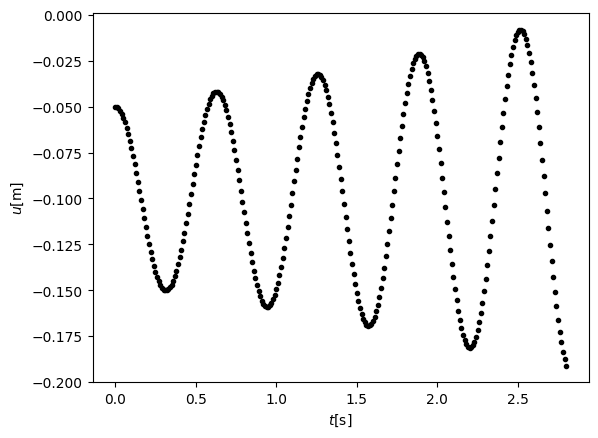

In [5]:
import numpy as np
import matplotlib.pyplot as plt

k = 10        #N/m
g = 9.81      #m/s^2
m = .1        #kg
dt = 0.01     #s
t_e = 3       #s
t = np.arange(0,t_e+dt,dt)
N = int(t_e/dt)+1

u = np.zeros(N)
v = np.zeros(N)
u[0] = -5E-2   #m

for i in range(N-1):
    a = (-m*g + -k*u[i])/m
    v[i+1] = v[i] + a*dt 
    u[i+1] = u[i] + (v[i]+v[i+1])/2*dt

plt.figure()
plt.xlabel('$t$[s]')
plt.ylabel('$u$[m]')
plt.plot(t[:-20],u[:-20],'k.')
plt.show()

We could improve the simulation slightly by using the information from the new position in the second step of the process: $v_{i+1}=v_i - \frac{k}{m}\frac{x_i+x_{i+1}}{2}\Delta t$. This is called a semi-implicit Euler method.

```{exercise}
Apply this to your code and add the total energy ($E_{kin}+E_z$) to both code cells. What is a good measure of stability?
```

Er zijn betere (d.w.z. stabielere) oplossingen, zoals de Runge-Kutta 4 methode. Die werken we (mathematisch) hier niet uit. Zie je dat je simulatie instabiel is, dan kun je m.b.v. bijvoorbeeld co-pilot een betere simulatie krijgen.


In [ ]:
k = 10        #N/m
g = 9.81      #m/s^2
m = .1        #kg
dt = 0.01     #s
t_e = 3       #s
N = int(t_e/dt)+1
t = np.arange(0,t_e+dt,dt)

u = np.zeros(N)
v = np.zeros(N)
u[0] = 5E-2   #m

# Uitvoeren van de simulatie via RK4
for i in range(0, N-1):
    # u' = v
    # v' = -k/m * u

    # k1
    ku1 = v[i]
    kv1 = -k/m * u[i]

    # k2
    ku2 = v[i] + 0.5 * dt * kv1
    kv2 = -k/m * (u[i] + 0.5 * dt * ku1)

    # k3
    ku3 = v[i] + 0.5 * dt * kv2
    kv3 = -k/m * (u[i] + 0.5 * dt * ku2)

    # k4
    ku4 = v[i] + dt * kv3
    kv4 = -k/m * (u[i] + dt * ku3)

    # volgende stap
    u[i+1] = u[i] + dt/6 * (ku1 + 2*ku2 + 2*ku3 + ku4)
    v[i+1] = v[i] + dt/6 * (kv1 + 2*kv2 + 2*kv3 + kv4)

# Plotten van de gegevens.    
plt.figure()

plt.xlabel('$t$(s)')
plt.ylabel('$x$(m)')

plt.plot(t,u,'r.', markersize=1)

plt.show()


```{exercise}
Also add the plot for the total energy to the code above. What is the percentage deviation in total energy between the beginning and end of the simulation?
```

<!-- Jouw antwoord -->